In [5]:
#Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [6]:
#Reading and cleaning "Human Development Index" Data
humanDevIndex=pd.read_csv("Resources/HumanDevelopmentIndex.csv")
humanDevIndex=humanDevIndex.dropna(how='any')
humanDevIndex=humanDevIndex.rename(columns={"Country":"Country Name"})
humanDevIndex=humanDevIndex.iloc[:,0:28]
humanDevIndex.iloc[:,2:28]=humanDevIndex.iloc[:,2:28].astype(float)
for i in range(2,28):
    humanDevIndex.iloc[:,i]=humanDevIndex.iloc[:,i].map("{:.2f}".format)

humanDevIndex.head()


,HDI Rank (2018),Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.48,0.49,0.49
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,0.71,0.72,0.72,0.73,0.74,0.76,0.77,0.78,0.79,0.79
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.70,0.71,0.71,0.72,0.73,0.74,0.74,0.75,0.75,0.75
6,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,0.80,0.81,0.81,0.81,0.82,0.82,0.82,0.82,0.82,0.83
7,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,0.71,0.72,0.73,0.72,0.73,0.73,0.74,0.74,0.75,0.75


In [7]:
humanDevIndex["Country Name"].count()

158

In [8]:
#Reading and cleaning "Energy Consumption" Data
energyCons=pd.read_csv("Resources/TheWorldBank/EnergyConsumption.csv")
energyCons=energyCons.dropna(how='any')
energyCons=energyCons.iloc[:,2:30]
rename_map = {}
for columns in energyCons.columns:
    if '[' in columns:
         rename_map[columns] = columns.split()[0]

energyCons=energyCons.rename(columns=rename_map)
energyCons=energyCons.dropna(how='any')
energyCons.dtypes
energyCons.iloc[:,2:28]=energyCons.iloc[:,2:28].astype(float)
for i in range(2,28):
    energyCons.iloc[:,i]=energyCons.iloc[:,i].map("{:.2f}".format)

energyCons.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,15.92,17.04,26.52,30.59,32.80,35.08,37.95,41.43,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,Albania,ALB,25.52,33.00,46.81,51.15,51.46,50.61,51.64,55.95,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,Algeria,DZA,0.18,0.32,0.29,0.48,0.40,0.42,0.39,0.47,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,American Samoa,ASM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.70,0.70,0.89
4,Andorra,AND,14.27,14.27,14.31,13.92,14.56,14.48,14.10,14.19,...,17.49,16.94,17.42,17.52,19.09,18.97,19.20,19.56,19.89,19.75


In [9]:
energyCons["Country Name"].count()

243

In [10]:
#Merging two datasets
merged_df=pd.merge(humanDevIndex,energyCons,on="Country Name",how='outer')
merged_df=merged_df.dropna(how='any')
merged_df.head()

,HDI Rank (2018),Country Name,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y
0,170,Afghanistan,0.30,0.30,0.31,0.31,0.30,0.33,0.33,0.34,...,37.14,33.86,21.34,17.81,14.84,11.48,13.97,16.33,19.31,18.42
1,69,Albania,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,31.71,32.10,35.91,37.22,37.12,35.96,40.05,41.29,38.69,38.62
2,82,Algeria,0.58,0.58,0.59,0.59,0.60,0.60,0.61,0.62,...,0.41,0.41,0.30,0.31,0.26,0.18,0.19,0.14,0.07,0.06
3,48,Argentina,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.19,8.89,7.61,8.57,8.96,10.12,9.87,10.21,10.90,10.04
4,81,Armenia,0.63,0.63,0.58,0.59,0.60,0.60,0.61,0.62,...,7.65,7.02,6.41,7.80,9.36,8.01,6.57,6.77,7.72,15.79


In [11]:
merged_df["Country Name"].count()

127

In [12]:
rename_value = {}
for countries in merged_df["Country Name"]:
    if ' (' in countries:
         rename_value[countries]=countries.split(" (")[0]
    else:
        merged_df["Country Name"]=merged_df["Country Name"]

merged_df["Country Name"]=merged_df["Country Name"].replace(rename_value)

#merged_df["Country Name"]=merged_df["Country Name"].rename(rows={"Yemen, Rep.":"Yemen"})

merged_df=merged_df.groupby("Country Name").sum().reset_index()
merged_df=merged_df.dropna(how='any')
del merged_df["Country Code"]


In [13]:
merged_df=merged_df.drop([33],axis=0)

In [14]:
merged_df.iloc[:,2:52]=merged_df.iloc[:,2:52].astype(float)

In [15]:

merged_df.columns

Index(['Country Name', 'HDI Rank (2018)', '1990_x', '1991_x', '1992_x',
       '1993_x', '1994_x', '1995_x', '1996_x', '1997_x', '1998_x', '1999_x',
       '2000_x', '2001_x', '2002_x', '2003_x', '2004_x', '2005_x', '2006_x',
       '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x', '2013_x',
       '2014_x', '2015_x', '1990_y', '1991_y', '1992_y', '1993_y', '1994_y',
       '1995_y', '1996_y', '1997_y', '1998_y', '1999_y', '2000_y', '2001_y',
       '2002_y', '2003_y', '2004_y', '2005_y', '2006_y', '2007_y', '2008_y',
       '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y'],
      dtype='object')

In [16]:
merged_df["Total HDI"]=merged_df.iloc[:,2:27].sum(axis=1)
merged_df["Total Energy Consumption"]=merged_df.iloc[:,28:52].sum(axis=1)
merged_df["Avg HDI"]=merged_df.iloc[:,2:27].mean(axis=1)
merged_df["Avg Energy Consumption"]=merged_df.iloc[:,28:52].mean(axis=1)

In [17]:
merged_df.head()

,Country Name,HDI Rank (2018),1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,14.84,11.48,13.97,16.33,19.31,18.42,9.59,785.43,0.3836,32.726250
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,37.12,35.96,40.05,41.29,38.69,38.62,17.14,973.24,0.6856,40.551667
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.26,0.18,0.19,0.14,0.07,0.06,16.63,9.06,0.6652,0.377500
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,8.96,10.12,9.87,10.21,10.90,10.04,19.31,243.71,0.7724,10.154583
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,9.36,8.01,6.57,6.77,7.72,15.79,16.71,197.49,0.6684,8.228750


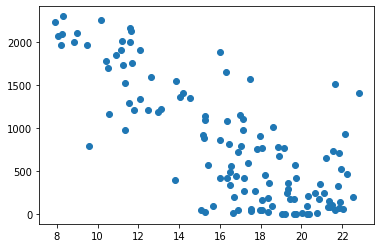

In [18]:
plt.scatter(merged_df["Total HDI"], merged_df["Total Energy Consumption"])

Correlation coefficient: -0.7740697545215723 



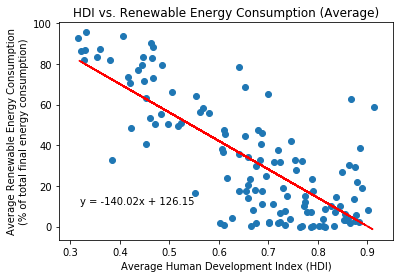

In [19]:
#plt.scatter(merged_df["Avg HDI"], merged_df["Avg Energy Consumption"])
plt.title("HDI vs. Renewable Energy Consumption (Average)")
plt.xlabel("Average Human Development Index (HDI)")
plt.ylabel(r"Average Renewable Energy Consumption" + "\n" + "(% of total final energy consumption)")

x_values = merged_df["Avg HDI"]
y_values = merged_df["Avg Energy Consumption"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (0.32, 11), fontsize = 10, color = "black")

print(f"Correlation coefficient: {rvalue} \n")

In [23]:
# The cut-off points are: HDI of less than 0.550 for low human development, 
# 0.550–0.699 for medium human development, 
# 0.700–0.799 for high human development 
# and 0.800 or greater for very high human development.
bins=[0,0.549,0.699,0.799,1]
labels=["Low Human Development","Medium Human Development", "High Human Development","Very High Human Development"]
merged_df["HD Group"]=pd.cut(merged_df["Avg HDI"],bins,labels=labels)
merged_df

,Country Name,HDI Rank (2018),1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2011_y,2012_y,2013_y,2014_y,2015_y,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
0,Afghanistan,170,0.3,0.3,0.31,0.31,0.3,0.33,0.33,0.34,...,11.48,13.97,16.33,19.31,18.42,9.59,785.43,0.3836,32.726250,Low Human Development
1,Albania,69,0.64,0.62,0.61,0.61,0.62,0.63,0.64,0.64,...,35.96,40.05,41.29,38.69,38.62,17.14,973.24,0.6856,40.551667,Medium Human Development
2,Algeria,82,0.58,0.58,0.59,0.59,0.6,0.6,0.61,0.62,...,0.18,0.19,0.14,0.07,0.06,16.63,9.06,0.6652,0.377500,Medium Human Development
3,Argentina,48,0.71,0.71,0.72,0.72,0.73,0.73,0.74,0.75,...,10.12,9.87,10.21,10.90,10.04,19.31,243.71,0.7724,10.154583,High Human Development
4,Armenia,81,0.63,0.63,0.58,0.59,0.6,0.6,0.61,0.62,...,8.01,6.57,6.77,7.72,15.79,16.71,197.49,0.6684,8.228750,Medium Human Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,United Kingdom,15,0.78,0.79,0.8,0.81,0.83,0.84,0.84,0.85,...,4.4,4.75,6.02,7.40,8.71,21.64,43.47,0.8656,1.811250,Very High Human Development
121,Uruguay,57,0.69,0.7,0.7,0.7,0.71,0.71,0.72,0.73,...,48.84,46.92,50.75,55.39,58.02,18.63,1012.62,0.7452,42.192500,High Human Development
122,World,,0.6,0.6,0.6,0.61,0.61,0.62,0.62,0.62,...,17.21,17.48,17.7,17.87,18.05,16.36,419.40,0.6544,17.475000,Medium Human Development
123,Zambia,143,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,...,90.9,88.63,88.48,88.03,87.99,11.66,2125.79,0.4664,88.574583,Low Human Development


In [28]:
# eliminated yrs
new_merged_df = merged_df[["Country Name","Total HDI", "Total Energy Consumption", "Avg HDI", "Avg Energy Consumption", "HD Group"]]
new_merged_df.head()

,Country Name,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
0,Afghanistan,9.59,785.43,0.3836,32.726250,Low Human Development
1,Albania,17.14,973.24,0.6856,40.551667,Medium Human Development
2,Algeria,16.63,9.06,0.6652,0.377500,Medium Human Development
3,Argentina,19.31,243.71,0.7724,10.154583,High Human Development
4,Armenia,16.71,197.49,0.6684,8.228750,Medium Human Development


In [39]:
# low dev data
low_dev = new_merged_df.loc[new_merged_df["HD Group"]== "Low Human Development"]
low_dev.head()

,Country Name,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
0,Afghanistan,9.59,785.43,0.3836,32.726250,Low Human Development
8,Bangladesh,12.08,1330.84,0.4832,55.451667,Low Human Development
12,Benin,10.52,1693.11,0.4208,70.546250,Low Human Development
17,Burundi,8.29,2295.12,0.3316,95.630000,Low Human Development
18,Cameroon,11.61,1991.67,0.4644,82.986250,Low Human Development


In [71]:
# low dev stats
low_dev_country = low_dev["Country Name"].nunique()
low_dev_total = low_dev["Total Energy Consumption"].sum()
low_dev_avg = low_dev["Total Energy Consumption"].mean()

low_dev_df = pd.DataFrame({"Development": "Low Human Develpment",
    "Country Total": [low_dev_country],
                                  "Total Energy Consumption": [low_dev_total],
                                  "Average of Total Energy Consumption": [low_dev_avg],
                                  })
low_dev_df["Total Energy Consumption"]=low_dev_df["Total Energy Consumption"].map("{:,}".format)
low_dev_df["Average of Total Energy Consumption"]=low_dev_df["Average of Total Energy Consumption"].map("{:,.2f}".format)
low_dev_df

,Development,Country Total,Total Energy Consumption,Average of Total Energy Consumption
0,Low Human Develpment,31,"53,325.73","1,720.18"


In [53]:
# med dev data
medium_dev = new_merged_df.loc[new_merged_df["HD Group"]== "Medium Human Development"]
medium_dev.head()

,Country Name,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
1,Albania,17.14,973.24,0.6856,40.551667,Medium Human Development
2,Algeria,16.63,9.06,0.6652,0.377500,Medium Human Development
4,Armenia,16.71,197.49,0.6684,8.228750,Medium Human Development
11,Belize,16.47,815.87,0.6588,33.994583,Medium Human Development
13,Botswana,15.20,882.85,0.6080,36.785417,Medium Human Development


In [70]:
# med dev stats
med_dev_country = medium_dev["Country Name"].nunique()
med_dev_total = medium_dev["Total Energy Consumption"].sum()
med_dev_avg = medium_dev["Total Energy Consumption"].mean()

medium_dev_df = pd.DataFrame({"Development": "Medium Human Develpment",
    "Country Total": [med_dev_country],
                                  "Total Energy Consumption": [med_dev_total],
                                  "Average of Total Energy Consumption": [med_dev_avg],
                                  })
medium_dev_df["Total Energy Consumption"]=medium_dev_df["Total Energy Consumption"].map("{:,}".format)
medium_dev_df["Average of Total Energy Consumption"]=medium_dev_df["Average of Total Energy Consumption"].map("{:,.2f}".format)
medium_dev_df

,Development,Country Total,Total Energy Consumption,Average of Total Energy Consumption
0,Medium Human Develpment,36,"27,548.31",765.23


In [62]:
# high dev data
high_dev = new_merged_df.loc[new_merged_df["HD Group"]== "High Human Development"]
high_dev.head()

,Country Name,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
3,Argentina,19.31,243.71,0.7724,10.154583,High Human Development
7,Bahrain,19.64,0.00,0.7856,0.000000,High Human Development
9,Barbados,19.33,284.35,0.7732,11.847917,High Human Development
16,Bulgaria,18.36,189.37,0.7344,7.890417,High Human Development
21,Chile,19.17,769.58,0.7668,32.065833,High Human Development


In [68]:
# high dev stats
high_dev_country = high_dev["Country Name"].nunique()
high_dev_total = high_dev["Total Energy Consumption"].sum()
high_dev_avg = high_dev["Total Energy Consumption"].mean()

high_dev_df = pd.DataFrame({"Development": "High Human Develpment",
    "Country Total": [high_dev_country],
                                  "Total Energy Consumption": [high_dev_total],
                                  "Average of Total Energy Consumption": [high_dev_avg],
                                  })
high_dev_df["Total Energy Consumption"]=high_dev_df["Total Energy Consumption"].map("{:,.2f}".format)
high_dev_df["Average of Total Energy Consumption"]=high_dev_df["Average of Total Energy Consumption"].map("{:.2f}".format)
high_dev_df

,Development,Country Total,Total Energy Consumption,Average of Total Energy Consumption
0,High Human Develpment,29,"9,597.66",330.95


In [72]:
# very high dev data
vhigh_dev = new_merged_df.loc[new_merged_df["HD Group"]== "Very High Human Development"]
vhigh_dev.head()

,Country Name,Total HDI,Total Energy Consumption,Avg HDI,Avg Energy Consumption,HD Group
5,Australia,22.53,191.42,0.9012,7.975833,Very High Human Development
6,Austria,21.23,644.21,0.8492,26.842083,Very High Human Development
10,Belgium,21.85,66.22,0.8740,2.759167,Very High Human Development
15,Brunei Darussalam,20.26,1.35,0.8104,0.056250,Very High Human Development
19,Canada,21.95,525.47,0.8780,21.894583,Very High Human Development


In [73]:
# very high dev stats
vhigh_dev_country = vhigh_dev["Country Name"].nunique()
vhigh_dev_total = vhigh_dev["Total Energy Consumption"].sum()
vhigh_dev_avg = vhigh_dev["Total Energy Consumption"].mean()

vhigh_dev_df = pd.DataFrame({"Development": "Very High Human Develpment",
    "Country Total": [high_dev_country],
                                  "Total Energy Consumption": [high_dev_total],
                                  "Average of Total Energy Consumption": [high_dev_avg],
                                  })
vhigh_dev_df["Total Energy Consumption"]=vhigh_dev_df["Total Energy Consumption"].map("{:,.2f}".format)
vhigh_dev_df["Average of Total Energy Consumption"]=vhigh_dev_df["Average of Total Energy Consumption"].map("{:.2f}".format)
vhigh_dev_df

,Development,Country Total,Total Energy Consumption,Average of Total Energy Consumption
0,Very High Human Develpment,29,"9,597.66",330.95


In [79]:
# merging data frames
hdi_stats = pd.concat([low_dev_df, medium_dev_df, high_dev_df, vhigh_dev_df])

hdi_stats

,Development,Country Total,Total Energy Consumption,Average of Total Energy Consumption
0,Low Human Develpment,31,"53,325.73","1,720.18"
0,Medium Human Develpment,36,"27,548.31",765.23
0,High Human Develpment,29,"9,597.66",330.95
0,Very High Human Develpment,29,"9,597.66",330.95
